Training size: 60501, Validation size: 20167, Test size: 20168
Train FM MSE: 1.1682 Validation FM MSE: 1.1884
Train FM MSE: 1.0827 Validation FM MSE: 1.0997
Train FM MSE: 1.0392 Validation FM MSE: 1.0551
Train FM MSE: 1.0122 Validation FM MSE: 1.0277
Train FM MSE: 0.9932 Validation FM MSE: 1.0088
Train FM MSE: 0.9787 Validation FM MSE: 0.9947
Train FM MSE: 0.9669 Validation FM MSE: 0.9834
Train FM MSE: 0.9567 Validation FM MSE: 0.9739
Train FM MSE: 0.9479 Validation FM MSE: 0.9657
Train FM MSE: 0.9399 Validation FM MSE: 0.9585
Train FM MSE: 0.9326 Validation FM MSE: 0.9519
Train FM MSE: 0.9259 Validation FM MSE: 0.9460
Train FM MSE: 0.9196 Validation FM MSE: 0.9405
Train FM MSE: 0.9137 Validation FM MSE: 0.9353
Train FM MSE: 0.9082 Validation FM MSE: 0.9305
Train FM MSE: 0.9030 Validation FM MSE: 0.9260
Train FM MSE: 0.8980 Validation FM MSE: 0.9218
Train FM MSE: 0.8933 Validation FM MSE: 0.9178
Train FM MSE: 0.8888 Validation FM MSE: 0.9139
Train FM MSE: 0.8845 Validation FM MSE: 0.91

KeyboardInterrupt: 

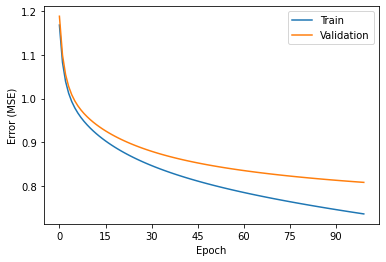

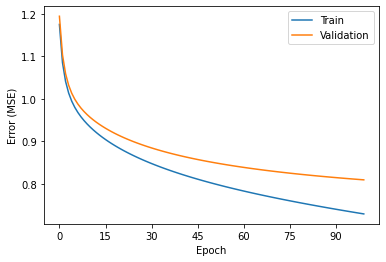

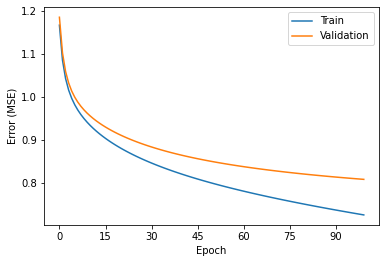

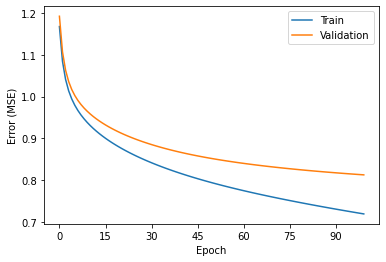

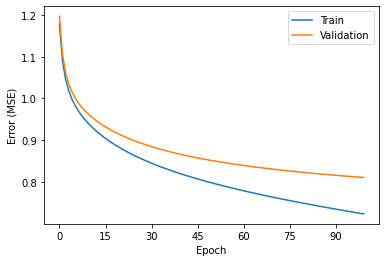

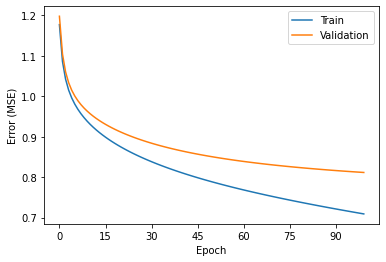

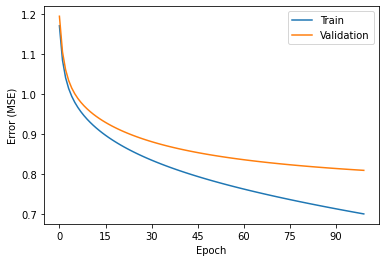

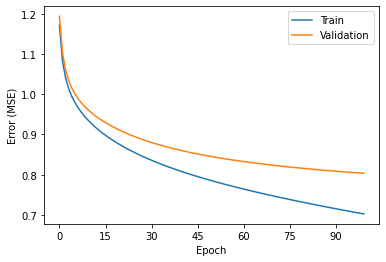

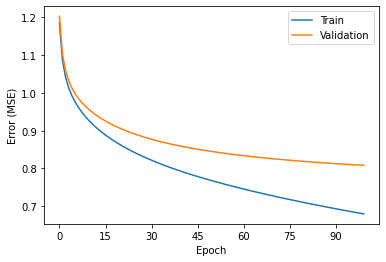

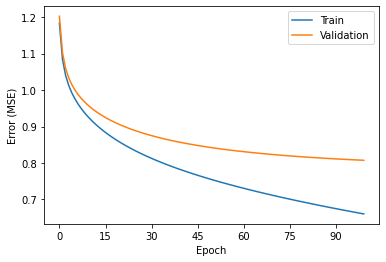

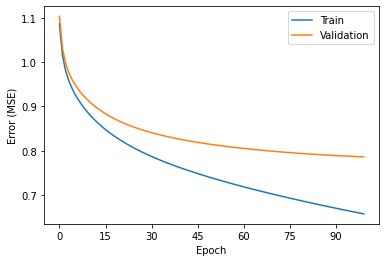

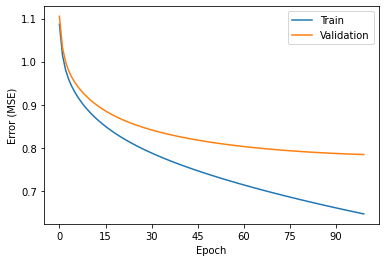

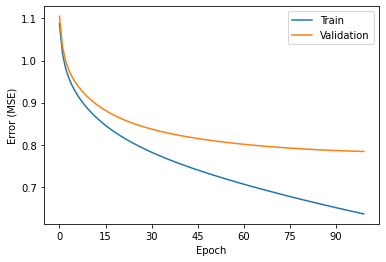

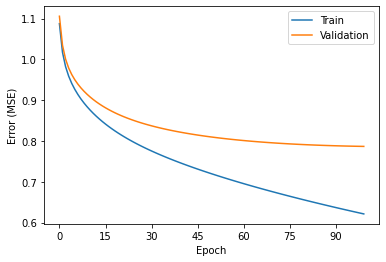

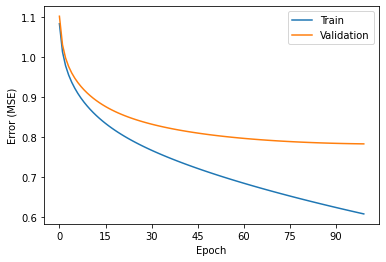

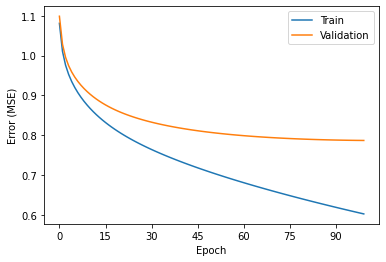

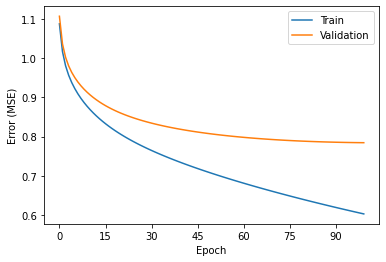

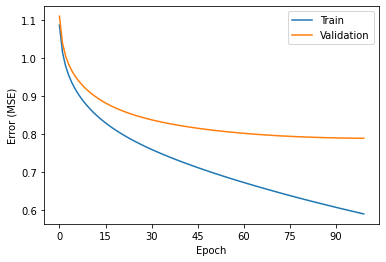

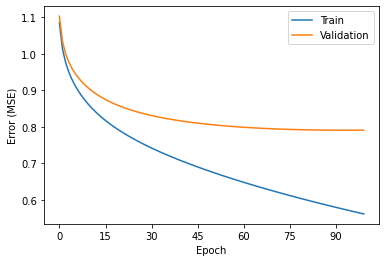

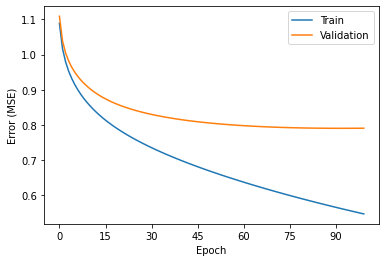

In [17]:
import numpy as np
from scipy import sparse
from pyfm import pylibfm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_filename = "ml_latest_small_formated_with_genres.npz"
#X_filename = "ml_latest_small_formated.npz"
X = sparse.load_npz(X_filename)
filename="ml-latest-small/ratings.csv"
data=np.genfromtxt(filename,skip_header=1,delimiter=",")
y = data[:,-2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Training size: %d, Validation size: %d, Test size: %d" % (X_train.shape[0],X_val.shape[0],X_test.shape[0]))



#num_factor=15
#learning_rate=0.001
learning_rate_arr=np.linspace(0.0001,0.001,10)
num_factor_arr=[6,8,10,12,14,16,18,20,30,40]
nr_epochs=100
error_dict={}

for learning_rate in learning_rate_arr:
    for num_factor in num_factor_arr:
        fm = pylibfm.FM(num_cols=np.max(X_train.indices) + 1, num_factor=num_factor, task="regression", learning_rate=learning_rate)
        train_error=[]
        val_error=[]
        for i in range(nr_epochs):
            fm.learn(X_train, y_train)
            preds_train = fm.predict(X_train)
            preds_test = fm.predict(X_test)
            train_error_tmp = mean_squared_error(y_train, preds_train,squared=False)    # RMSE
            val_error_tmp = mean_squared_error(y_test, preds_test,squared=False)        # RMSE
            train_error.append(train_error_tmp)
            val_error.append(val_error_tmp)
            print("Train FM RMSE: %.4f Validation FM RMSE: %.4f" % (train_error_tmp, val_error_tmp))
        error_dict[str(learning_rate)+str(num_factor)+"train"]=train_error
        error_dict[str(learning_rate)+str(num_factor)+"val"]=val_error
        save_fig(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs)

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def save_fig(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs):
    fig_filename="train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(train_error,label="Train")
    plt.plot(val_error,label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error (RMSE)")
    #plt.ylim(0.5,1.1)
    plt.legend()
    if "genres" in X_filename:
        plt.savefig(fig_filename+"_with_genres.pdf")
    else:
        plt.savefig(fig_filename+".pdf")
#plt.show()

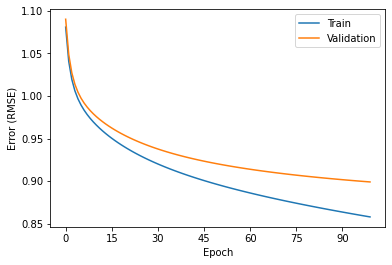

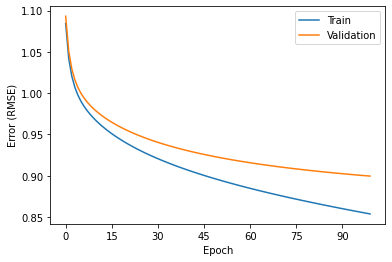

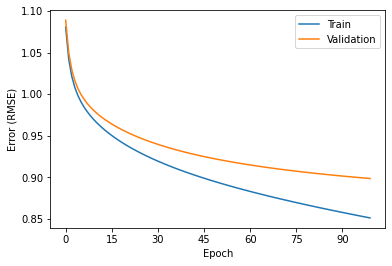

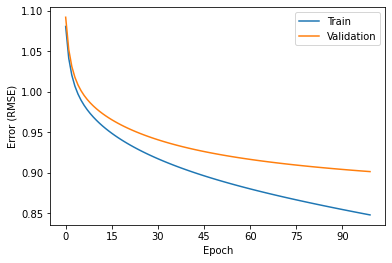

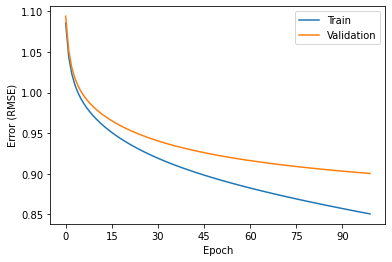

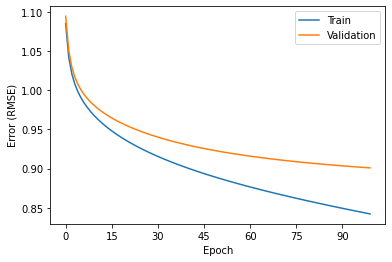

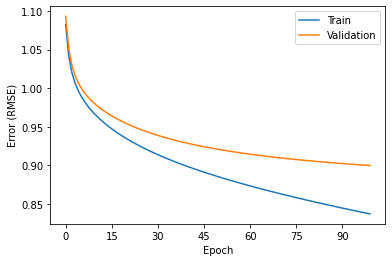

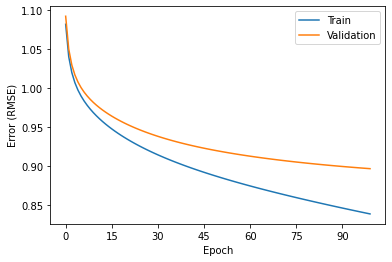

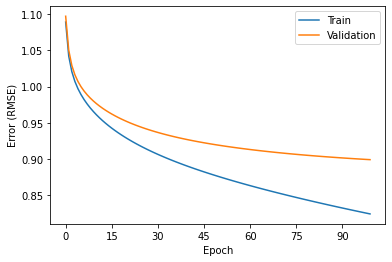

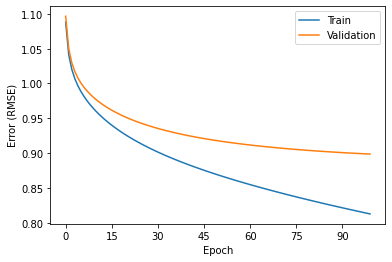

In [31]:
#Used to change from MSE->RMSE manually, useless now
"""
error_dict
#for key in error_dict.keys():
#    print(key)
fig_filename = "train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
learning_rate=learning_rate_arr[0]
for i in range(10):
    trainkey=str(learning_rate)+str(num_factor_arr[i])+"train"
    valkey=str(learning_rate)+str(num_factor_arr[i])+"val"
    fig_filename = "train_val_error_NF"+str(num_factor_arr[i])+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    train_error = np.sqrt(error_dict[trainkey])
    val_error = np.sqrt(error_dict[valkey])
    save_fig(train_error,val_error,X_filename,num_factor_arr[i],learning_rate,100)
"""